# Prepare a Categorical and Numeric Dataset for machine learning
##### Topics : Jupyter, Scaling, Encoding

This notebook requires additional Python modules to be imported.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [4]:
print('pandas Version:{0}'.format(pd.__version__))
print('Numpy Version :{0}'.format(np.__version__))

pandas Version:0.24.0
Numpy Version :1.17.2


In [69]:
#temporarily suppress warnings
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

### A Practice data that has patterns to be discovered 


Download link: https://github.com/worker-bee-micah/ml/data/


We have a system of automated food generating greenhouse pods that contain animals that are allowed to freely move between them.  Which pod does an animal prefer? What is the high yield fruit for that pod? What does the fan setting change? The pod's solar panels may supply surplus voltage that benefits certain animals or plants.  


The "mix" is one of 4 liquid fertilizer types that were also tested. There will be certain animal or plants that saw a benefit for each. 


Previous research showed that humidity affected one plant negatively, one positively and the rest seemed to have random values. 

Our questions for this example are: What were the most significant events and who benefited the most from a particular mix in each pod? 


The three data files TPS_report[1-3] have different random values, the categorical data is unchanged between them.  Start on one data file and find the optimal model, return here and use the other two sets to see if you get the same answers.

In [ ]:
!cat TPS_report1.csv

In [18]:
tps1_data = pd.read_csv('data/TPS_report1.csv', header=[0])
tps2_data = pd.read_csv('data/TPS_report2.csv', header=[0])
tps3_data = pd.read_csv('data/TPS_report3.csv', header=[0])

In [19]:
tps1_df = pd.DataFrame(tps1_data)
tps2_df = pd.DataFrame(tps2_data)
tps3_df = pd.DataFrame(tps3_data)

In [ ]:
print(tps1_df.head())
print(tps2_df.head())
print(tps3_df.head())
#all header rows and data should be filled for each file, we will work on one at a time

#### Examine the descriptive statistics for the first data set


The columns for mixes and humidity contain continous values, voltage is an integer but should be considered a category because there is only 3 values (0, 3.4, and 5.1) and should be encoded with the other text values.




In [7]:
print(len(tps1_df.index))
print(len(tps2_df.index))
print(len(tps3_df.index))

512
512
512


In [8]:
tps1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 12 columns):
serial         512 non-null int64
pod            512 non-null object
animal         512 non-null object
plant          512 non-null object
fan            512 non-null object
mix_a          512 non-null int64
mix_b          512 non-null int64
mix_c          512 non-null int64
mix_d          512 non-null int64
humidity       512 non-null int64
temperature    512 non-null object
voltage        512 non-null float64
dtypes: float64(1), int64(6), object(5)
memory usage: 48.1+ KB


In [ ]:
mixA_mean = tps1_df['mix_a'].mean()
mixA_max = tps1_df['mix_a'].max()
mixA_min = tps1_df['mix_a'].min()
mixA_median = tps1_df['mix_a'].median()

print('Mix A Mean: ', mixA_mean)
print('Mix A Max: ', mixA_max)
print('Mix A Min: ', mixA_min)
print('Mix A median: ', mixA_median)

In [ ]:
mixB_mean = tps1_df['mix_b'].mean()
mixB_max = tps1_df['mix_b'].max()
mixB_min = tps1_df['mix_b'].min()
mixB_median = tps1_df['mix_b'].median()

print('Mix B Mean: ', mixB_mean)
print('Mix B Max: ', mixB_max)
print('Mix B Min: ', mixB_min)
print('Mix B median: ', mixB_median)


In [ ]:
mixC_mean = tps1_df['mix_c'].mean()
mixC_max = tps1_df['mix_c'].max()
mixC_min = tps1_df['mix_c'].min()
mixC_median = tps1_df['mix_c'].median()

print('Mix C Mean: ', mixC_mean)
print('Mix C Max: ', mixC_max)
print('Mix C Min: ', mixC_min)
print('Mix C median: ', mixC_median)

In [ ]:
tps1_df.describe()

In [ ]:
# dispersion measures
print('Min Mix A : {0}'.format(tps1_df.mix_a.min())) # minimum
print('Max Mix A : {0}'.format(tps1_df.mix_a.max())) # maximum
print('Mix A range : {0}'.format(tps1_df.mix_a.max()  - tps1_df.mix_a.min())) # range
print('25 percentile : {0}'.format(tps1_df.mix_a.quantile(.25))) # 25 percentile
print('50 percentile : {0}'.format(tps1_df.mix_a.quantile(.5))) # 50 percentile
print('75 percentile : {0}'.format(tps1_df.mix_a.quantile(.75))) # 75 percentile
print('Variance Mix A : {0}'.format(tps1_df.mix_a.var())) # variance
print('Standard deviation Mix A : {0}'.format(tps1_df.mix_a.std())) # standard deviation

In [ ]:
print('Variance Mix A : {0}'.format(tps1_df.mix_a.var())) # variance
print('Variance Mix B : {0}'.format(tps1_df.mix_b.var()))
print('Variance Mix C : {0}'.format(tps1_df.mix_c.var()))
print('Variance Mix D : {0}'.format(tps1_df.mix_d.var()))
print('Variance Humidity : {0}'.format(tps1_df.humidity.var()))

In [ ]:
print('Standard Deviation Mix A : {0}'.format(tps1_df.mix_a.std())) # standard deviation
print('Standard Deviation Mix B : {0}'.format(tps1_df.mix_b.std()))
print('Standard Deviation Mix C : {0}'.format(tps1_df.mix_c.std()))
print('Standard Deviation Mix D : {0}'.format(tps1_df.mix_d.std()))
print('Standard Deviation Humidity : {0}'.format(tps1_df.humidity.std()))

In [ ]:
tps1_df.animal.value_counts()

In [ ]:
tps1_df.plant.value_counts()

In [ ]:
tps1_df.fan.value_counts(normalize=True)

In [ ]:
tps1_df.temperature.value_counts(normalize=True)

[Text(0.5,1,'Relationships between plants and humidity levels')]

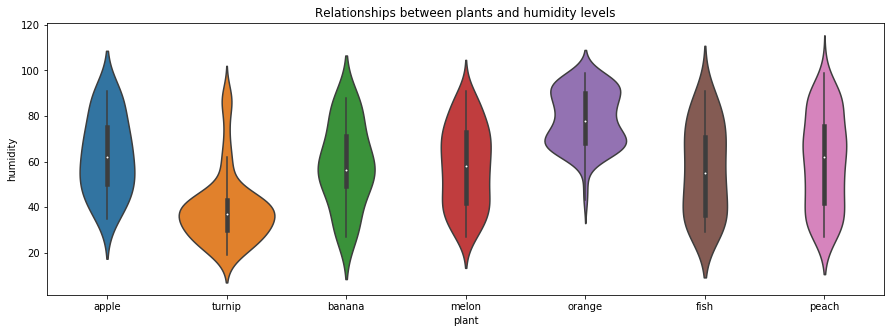

In [83]:
f,ax=plt.subplots(figsize=(15,5))

import warnings
warnings.filterwarnings("ignore")

sns.violinplot(x='plant', y='humidity', data=tps1_df)

props = {
    'title': 'Relationships between plants and humidity levels',
}
ax.set(**props)

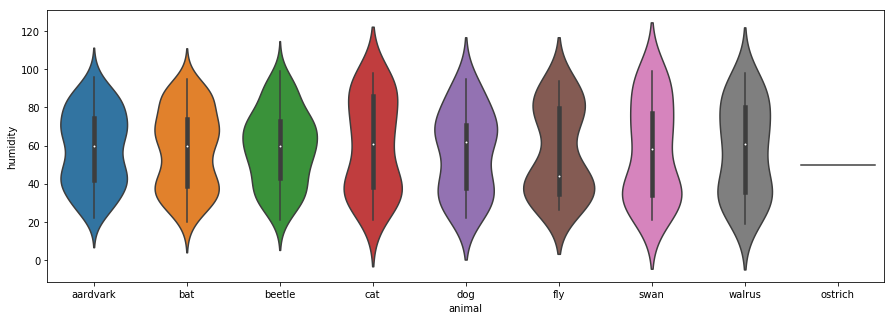

In [76]:
f,ax=plt.subplots(figsize=(15,5))

import warnings
warnings.filterwarnings("ignore")

sns.violinplot(x='animal', y='humidity', data=tps1_df)

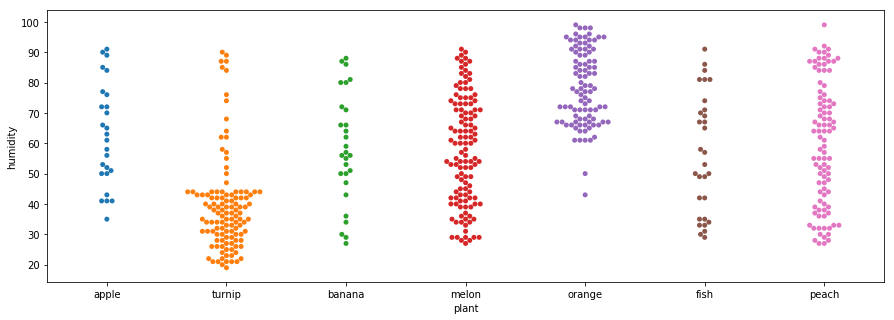

In [21]:
f,ax=plt.subplots(figsize=(15,5))

sns.swarmplot(x='plant', y='humidity', data=tps1_df)

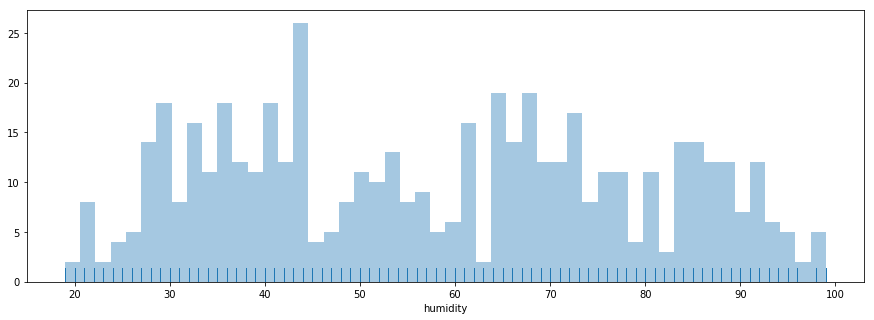

In [77]:
f,ax=plt.subplots(figsize=(15,5))

import warnings
warnings.filterwarnings("ignore")

sns.distplot(tps1_df['humidity'], bins=50, kde=False, rug=True)

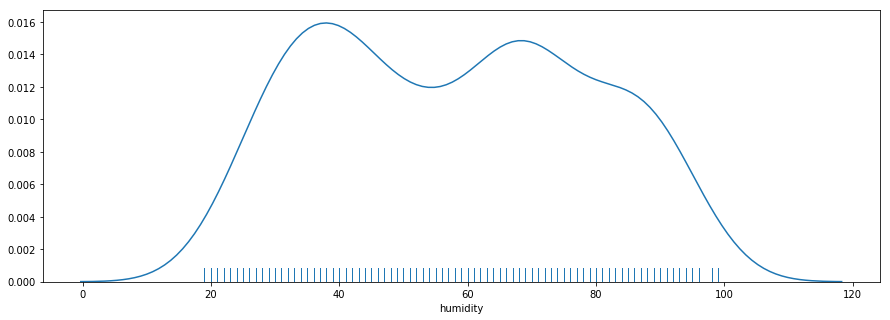

In [78]:
f,ax=plt.subplots(figsize=(15,5))

import warnings
warnings.filterwarnings("ignore")

sns.distplot(tps1_df['humidity'], hist=False, rug=True)

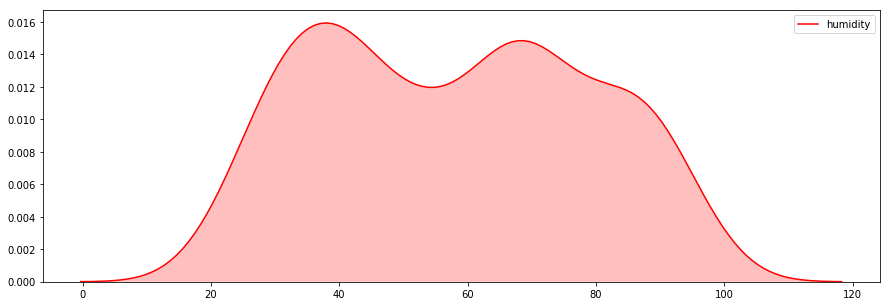

In [82]:
f,ax=plt.subplots(figsize=(15,5))

import warnings
warnings.filterwarnings("ignore")

sns.kdeplot(tps1_df['humidity'], shade=True, color='r')

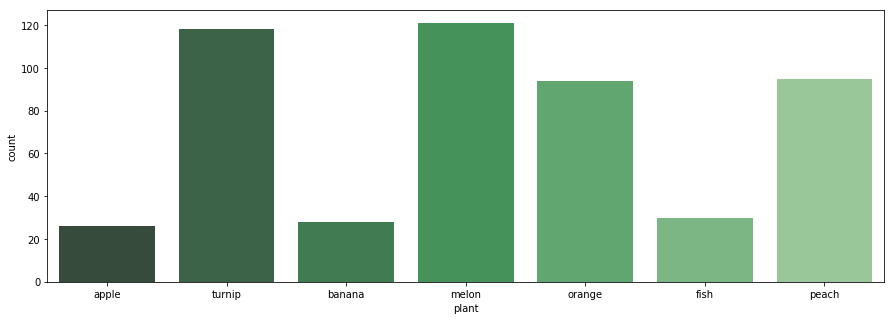

In [101]:
f,ax=plt.subplots(figsize=(15,5))
sns.countplot(x='plant', data=tps1_df, palette="Greens_d")

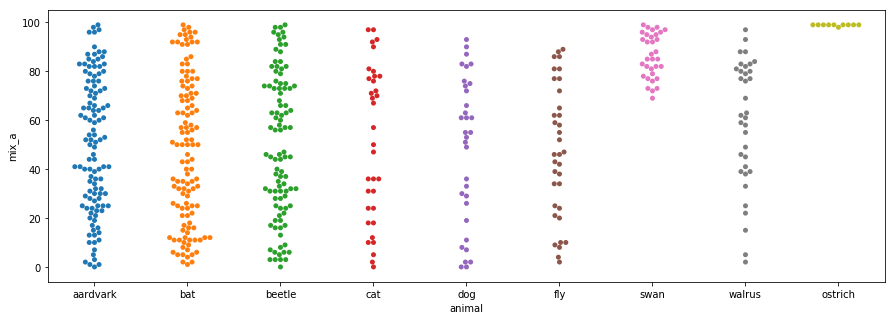

In [87]:
f,ax=plt.subplots(figsize=(15,5))

sns.swarmplot(x='animal', y='mix_a', data=tps1_df)

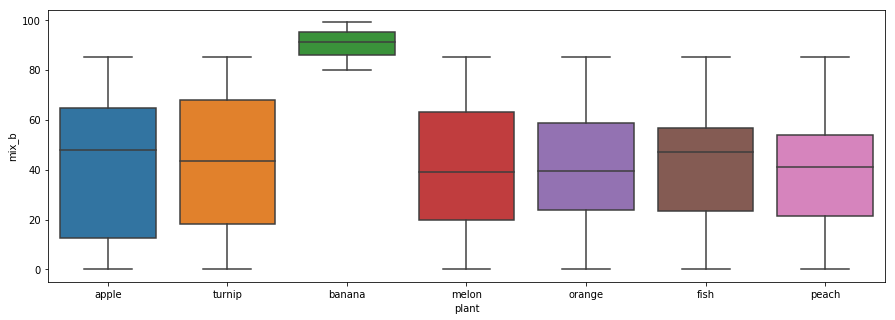

In [24]:
f,ax=plt.subplots(figsize=(15,5))

sns.boxplot(x='animal', y='mix_b', data=tps1_df)

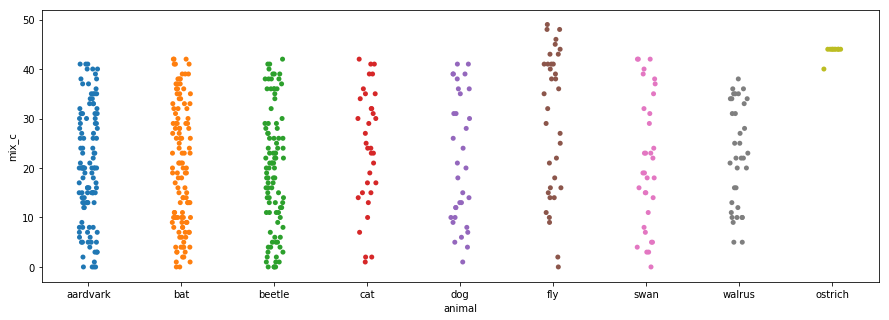

In [25]:
f,ax=plt.subplots(figsize=(15,5))

sns.stripplot(x='animal', y='mix_c', data=tps1_df, jitter=True)

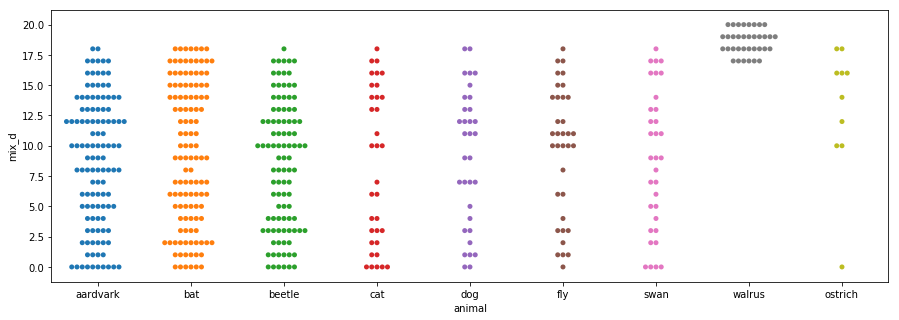

In [85]:
f,ax=plt.subplots(figsize=(15,5))

sns.swarmplot(x='animal', y='mix_d', data=tps1_df)

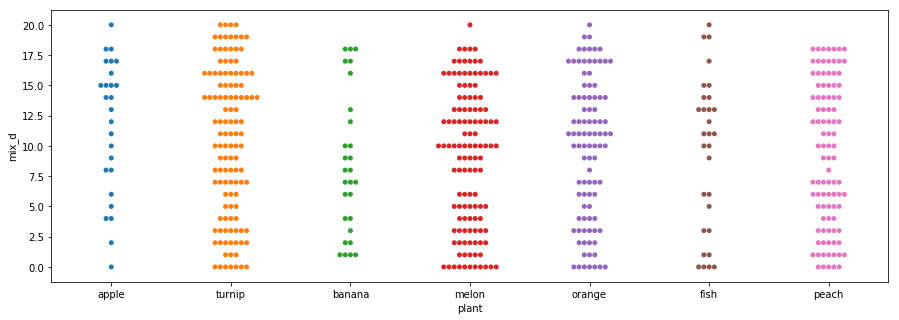

In [29]:
f,ax=plt.subplots(figsize=(15,5))

sns.swarmplot(x='plant', y='mix_d', data=tps1_df)

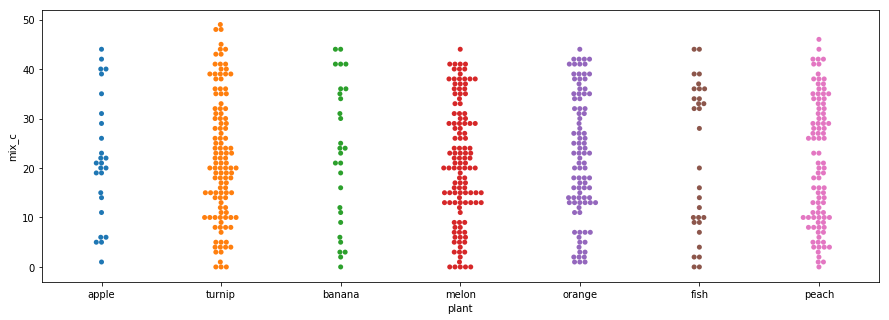

In [30]:
f,ax=plt.subplots(figsize=(15,5))

sns.swarmplot(x='plant', y='mix_c', data=tps1_df)

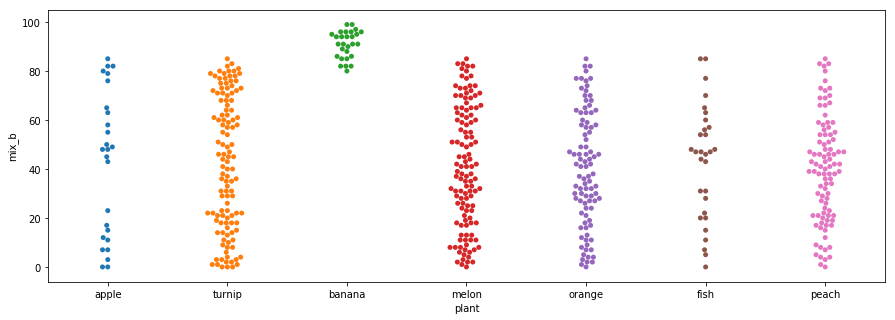

In [31]:
f,ax=plt.subplots(figsize=(15,5))

sns.swarmplot(x='plant', y='mix_b', data=tps1_df)

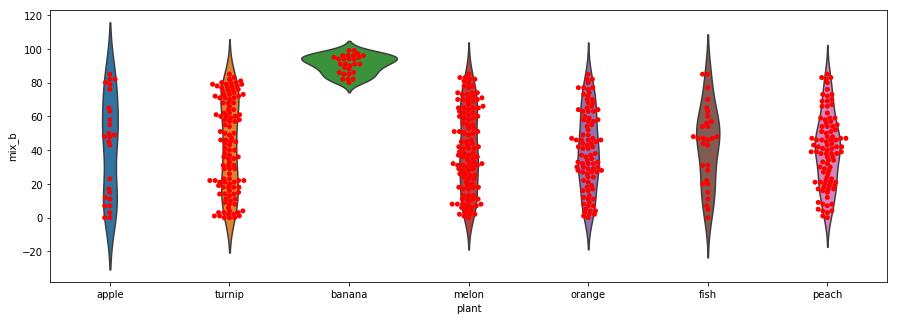

In [47]:
#it appears that banana increases with Mix C, 
#combine the swarm plot points over the area of the violin plot
f,ax=plt.subplots(figsize=(15,5))

sns.swarmplot(x='plant', y='mix_b', data=tps1_df, color='r')
sns.violinplot(x='plant', y='mix_b', data=tps1_df, inner=None)

#sns.swarmplot(x='plant', y='mix_a', data=tps1_df, color='g')
#sns.swarmplot(x='plant', y='mix_c', data=tps1_df, color='b')
#sns.swarmplot(x='plant', y='mix_d', data=tps1_df, color='y')


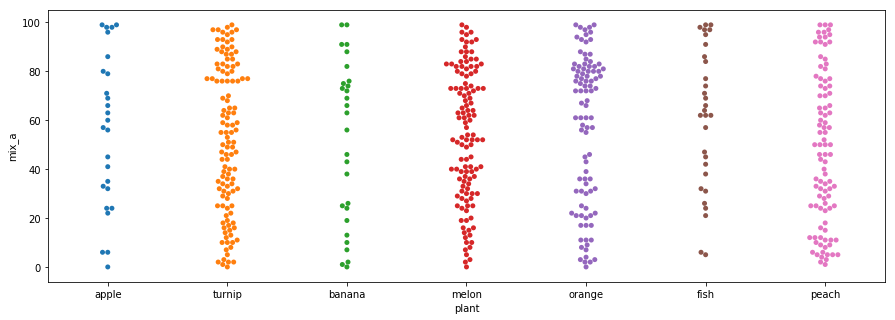

In [32]:
f,ax=plt.subplots(figsize=(15,5))

sns.swarmplot(x='plant', y='mix_a', data=tps1_df)

/home/tapew0rm/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


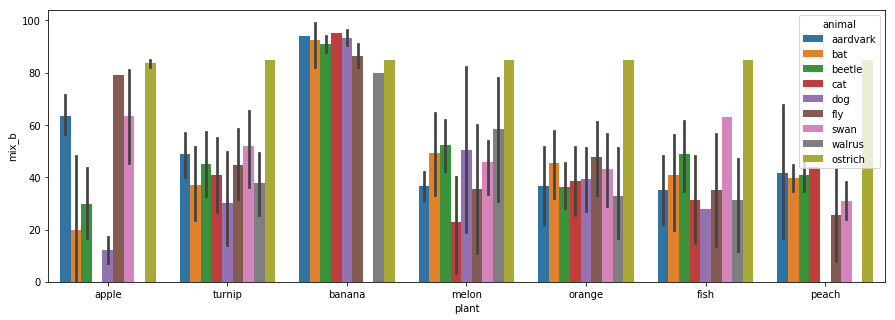

In [50]:
f,ax=plt.subplots(figsize=(15,5))

sns.barplot(x='plant', y='mix_b', data=tps1_df, hue='animal')

###The above graph shows that Mix B increased banana numbers

The bulk of the values for the mix_b column appears to be increasing bananas in some way. 
There is also an ostrich in each 

ValueError: Could not interpret input 'plant'

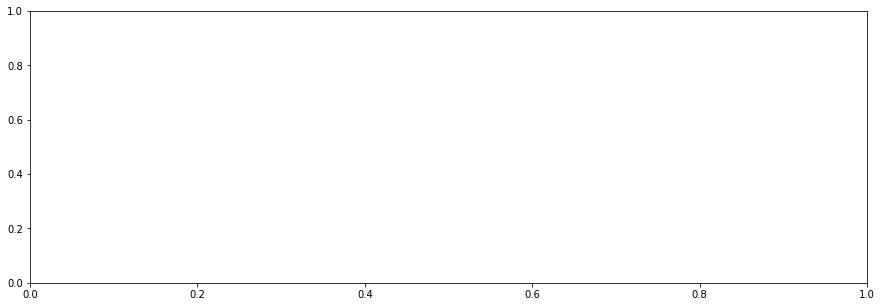

In [115]:
f,ax=plt.subplots(figsize=(15,5))

sns.swarmplot(x='plant', y='mix_b', data=tps1_df, color='r')
sns.violinplot(x='plant', y='mix_b', data=tps1_df, inner=None) 
#after you perfrom the scaling procedure below, return here. 
#

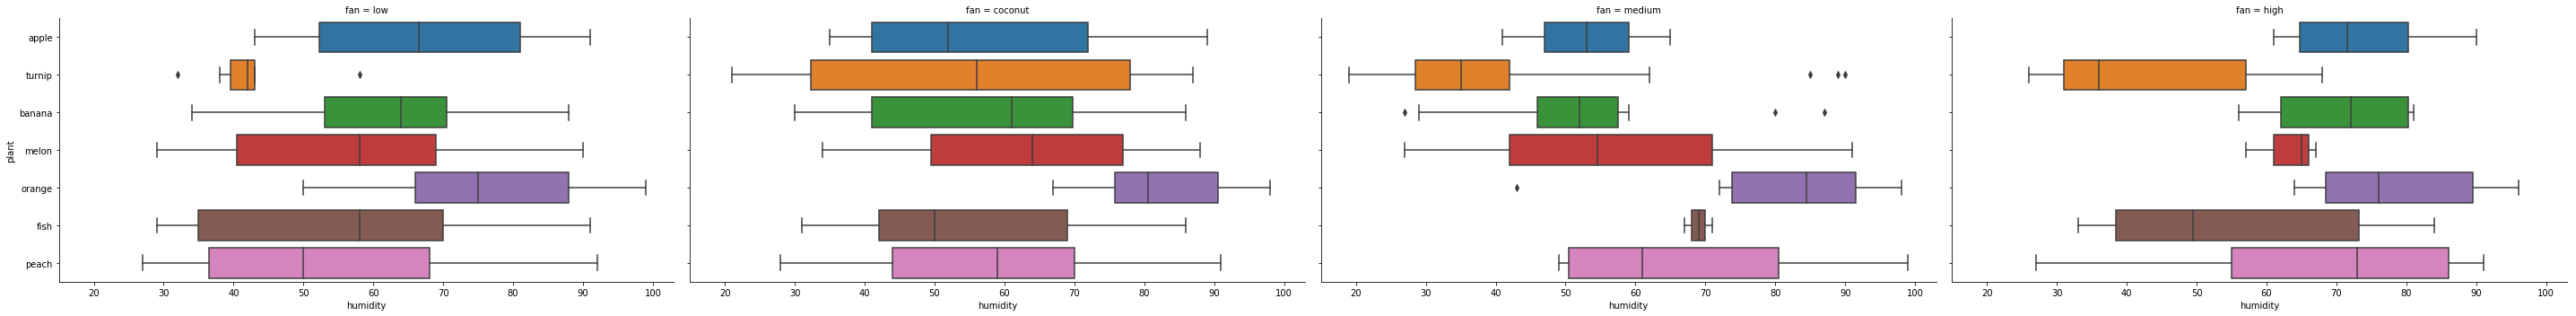

In [57]:
sns.factorplot(x='humidity', y='plant', data=tps1_df, size=5, aspect=2, 
              col="fan", kind="box")

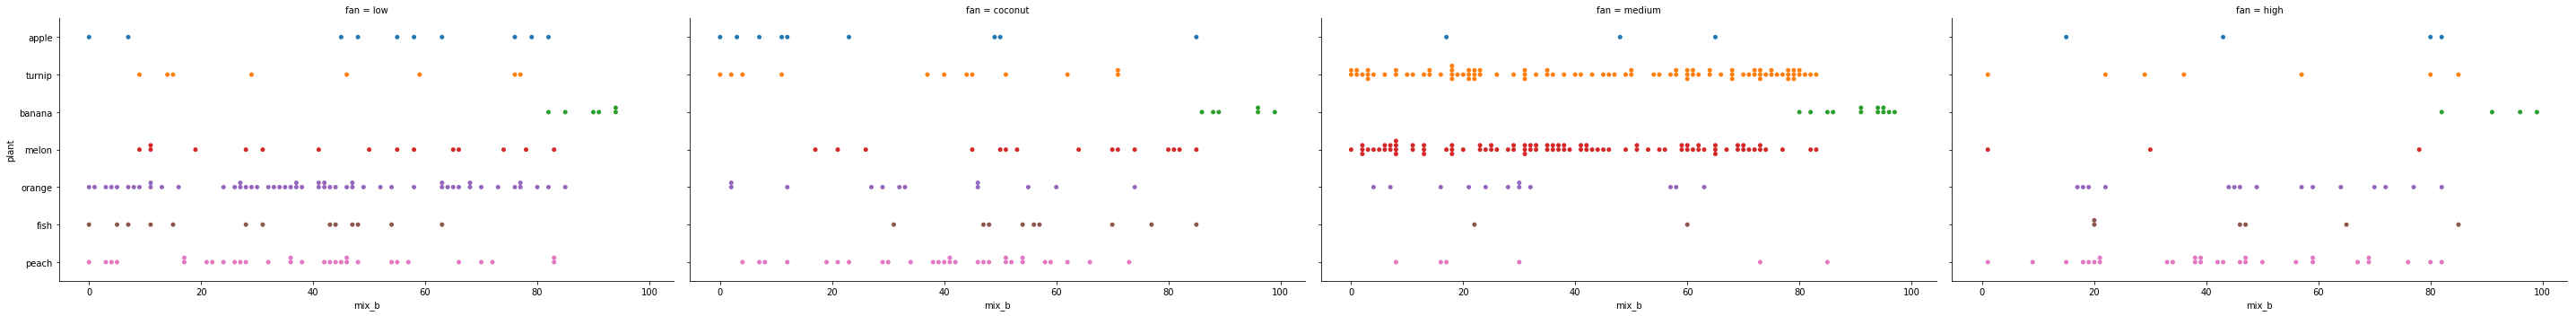

In [53]:
sns.factorplot(x='mix_b', y='plant', data=tps1_df, size=5, aspect=2, 
              col="fan", kind="swarm")

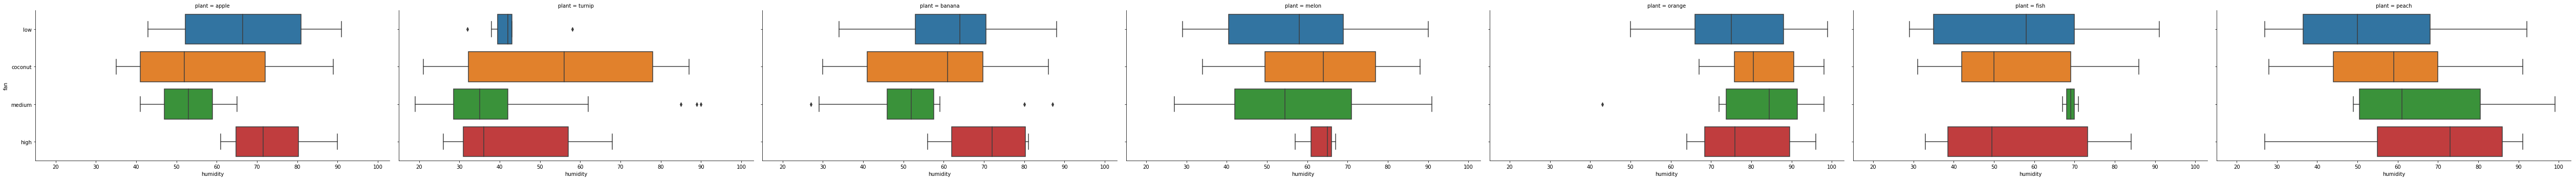

In [55]:
sns.factorplot(x='humidity', y='fan', data=tps1_df, size=5, aspect=2, 
              col="plant", kind="box")

### Standardize the Mix values with z-scaling:


Apply scaling on the mix values to express them in relations to each other. 


Z-score is the expression of a value in terms of the number of standard deviations from the mean. 


The effect is to give a score which is relative to the the distribution of values for that column

In [102]:
from sklearn import preprocessing

tps1_df[['mix_a']] = preprocessing.scale(tps1_df[['mix_a']])
tps1_df[['mix_b']] = preprocessing.scale(tps1_df[['mix_b']])
tps1_df[['mix_c']] = preprocessing.scale(tps1_df[['mix_c']])
tps1_df[['mix_d']] = preprocessing.scale(tps1_df[['mix_d']])

In [103]:
tps1_df

,serial,pod,animal,plant,fan,mix_a,mix_b,mix_c,mix_d,humidity,temperature,voltage
0,60429,Pod_0,aardvark,apple,low,0.605914,0.534352,1.039017,-0.278047,56,cold,3.4
1,56805,Pod_0,bat,turnip,coconut,0.099337,-1.666803,-0.071250,-0.447524,36,cold,3.4
2,60962,Pod_0,beetle,banana,medium,-1.555482,1.900587,-1.340127,-1.464383,29,hot,3.4
3,46081,Pod_0,cat,melon,high,-0.576099,-1.628852,0.166664,-1.294907,57,cold,3.4
4,51431,Pod_0,dog,orange,medium,1.146263,-0.604176,-1.260823,1.077765,43,hot,3.4
5,7568,Pod_0,fly,fish,high,0.301967,0.800009,-0.943603,0.060906,35,cold,3.4
6,83116,Pod_0,swan,peach,low,0.977403,-0.755980,-1.340127,0.230382,92,hot,3.4
7,34930,Pod_0,walrus,fish,coconut,1.483981,0.116892,-0.943603,1.586194,86,cold,3.4
8,98546,pod_a,aardvark,peach,low,-1.015133,1.483126,0.721798,1.247241,47,hot,3.4
9,3482,pod_a,aardvark,peach,high,0.707229,-1.097539,0.325274,0.399859,68,cold,3.4


#### After scaling, calculate the variance of each mix again


When you call the describe function you will see the changes as well.

In [ ]:
print('Variance Mix A : {0}'.format(tps1_df.mix_a.var()))
print('Variance Mix B : {0}'.format(tps1_df.mix_b.var()))
print('Variance Mix C : {0}'.format(tps1_df.mix_c.var()))
print('Variance Mix D : {0}'.format(tps1_df.mix_d.var()))
print('Variance Humidity : {0}'.format(tps1_df.humidity.var()))

In [104]:
tps1_df.describe()

,serial,mix_a,mix_b,mix_c,mix_d,humidity,voltage
count,512.000000,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,512.000000,512.000000
mean,51831.568359,3.903128e-17,-4.336809e-19,1.680513e-16,2.298509e-17,57.976562,4.342969
std,28314.902334,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,21.131020,0.845727
min,785.000000,-1.791884e+00,-1.666803e+00,-1.736651e+00,-1.633860e+00,19.000000,3.400000
25%,27538.750000,-8.462739e-01,-8.698329e-01,-7.849937e-01,-9.559535e-01,39.000000,3.400000
50%,52752.500000,9.933659e-02,3.039041e-03,-7.125041e-02,6.090563e-02,58.000000,5.100000
75%,75900.500000,8.760881e-01,8.000090e-01,8.804073e-01,9.082883e-01,75.000000,5.100000
max,99933.000000,1.551524e+00,2.090341e+00,2.149284e+00,1.755671e+00,99.000000,5.100000


In [116]:
tps1_df[tps1_df.isnull().any(axis=1)]

,serial,mix_a,mix_b,mix_c,mix_d,humidity,voltage_0,voltage_1,temperature_0,temperature_1,...,fan_coconut,fan_high,fan_low,fan_medium,pod_Pod_0,pod_pod_a,pod_pod_b,pod_pod_c,pod_pod_d,pod_pod_e


### Convert voltage & temperature column with **Label Encoding:**


Create a binary representation of the two columns that only contain two unique values.

Voltage values are integers which will be cast as 'dummies', or 

Convert the text values to numbers. These can be used in the following situations:

There are only two values for a column in your data. The values will then become 0/1 - effectively a binary representation

The values have relationship with each other where comparisons are meaningful (e.g. low<medium<high)

In [105]:
le = preprocessing.LabelEncoder()
tps1_df['temperature'] = le.fit_transform(tps1_df['temperature'].astype(str))
tps1_df['voltage'] = le.fit_transform(tps1_df['voltage'].astype(str))

In [106]:
tps1_df.head()

,serial,pod,animal,plant,fan,mix_a,mix_b,mix_c,mix_d,humidity,temperature,voltage
0,60429,Pod_0,aardvark,apple,low,0.605914,0.534352,1.039017,-0.278047,56,0,0
1,56805,Pod_0,bat,turnip,coconut,0.099337,-1.666803,-0.071250,-0.447524,36,0,0
2,60962,Pod_0,beetle,banana,medium,-1.555482,1.900587,-1.340127,-1.464383,29,1,0
3,46081,Pod_0,cat,melon,high,-0.576099,-1.628852,0.166664,-1.294907,57,0,0
4,51431,Pod_0,dog,orange,medium,1.146263,-0.604176,-1.260823,1.077765,43,1,0


In [107]:
le.classes_

array(['3.4', '5.1'], dtype=object)

#### Convert animals, plants and fans with One-Hot Encoding:

There is no meaningful comparison between values in columns 'voltage', 'temperature', 'fan', 'plant', 'animal'. This will create 24 new columns of 1's and 0's.



In [108]:
pd.get_dummies(tps1_df['voltage'])
pd.get_dummies(tps1_df['temperature'])

,0,1
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
5,1,0
6,0,1
7,1,0
8,0,1
9,1,0


#### Add the dummy columns to the data frame

In [109]:
tps1_df = pd.get_dummies(tps1_df, columns=['voltage'])
tps1_df = pd.get_dummies(tps1_df, columns=['temperature'])

In [112]:
tps1_df.head()

,serial,mix_a,mix_b,mix_c,mix_d,humidity,voltage_0,voltage_1,temperature_0,temperature_1,...,fan_coconut,fan_high,fan_low,fan_medium,pod_Pod_0,pod_pod_a,pod_pod_b,pod_pod_c,pod_pod_d,pod_pod_e
0,60429,0.605914,0.534352,1.039017,-0.278047,56,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
1,56805,0.099337,-1.666803,-0.071250,-0.447524,36,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,60962,-1.555482,1.900587,-1.340127,-1.464383,29,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
3,46081,-0.576099,-1.628852,0.166664,-1.294907,57,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,51431,1.146263,-0.604176,-1.260823,1.077765,43,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0


#### Apply one-hot-encoding for remaining non-numeric features

In [111]:
tps1_df = pd.get_dummies(tps1_df, columns=['animal', 
                                               'plant', 
                                               'fan',
                                               'pod'])

####Find relationships between the mixes, plants and animals

In [ ]:
sns.pairplot(tps1_df, size=3,
            vars=["mix_a", "mix_b", "mix_c", "mix_d", "animal"])

KeyError: 'plant'

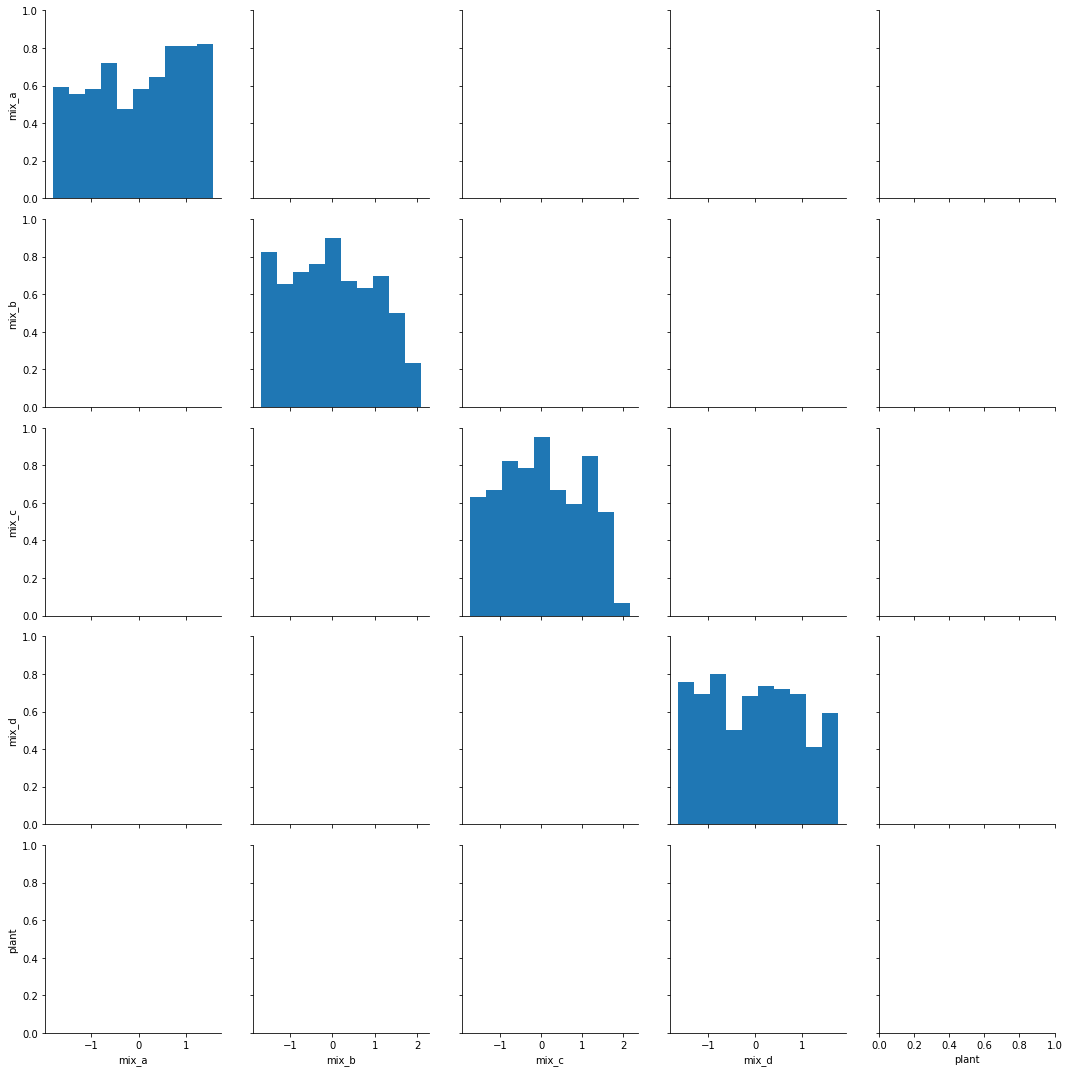

In [114]:
sns.pairplot(tps1_df, size=3,
            vars=["mix_a", "mix_b", "mix_c", "mix_d", "plant"])

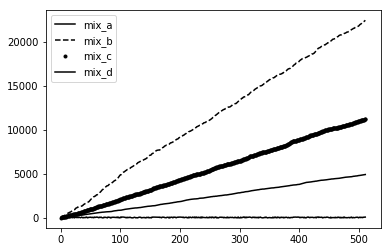

In [92]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(tps1_df.mix_a, 'k', label='mix_a')
ax.plot(tps1_df.mix_b.cumsum(), 'k--', label='mix_b')
ax.plot(tps1_df.mix_c.cumsum(), 'k.', label='mix_c')
ax.plot(tps1_df.mix_d.cumsum(), 'k', label='mix_d')
ax.legend(loc='best')

In [138]:
from sklearn.cluster import MeanShift

analyzer = MeanShift(bandwidth=5000)
analyzer.fit(tps1_df)

MeanShift(bandwidth=5000, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [139]:
from sklearn.cluster import estimate_bandwidth
estimate_bandwidth(tps1_df)

17147.340321224274

In [140]:
labels = analyzer.labels_

In [141]:
import numpy as np

np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [142]:
import numpy as np

tps1_df['cluster_group'] = np.nan
data_length = len(tps1_df)
for i in range(data_length):
    tps1_df.iloc[i, tps1_df.columns.get_loc('cluster_group')] = labels[i]

In [143]:
tps1_df.head()

,serial,mix_a,mix_b,mix_c,mix_d,humidity,voltage_0,voltage_1,temperature_0,temperature_1,...,fan_high,fan_low,fan_medium,pod_Pod_0,pod_pod_a,pod_pod_b,pod_pod_c,pod_pod_d,pod_pod_e,cluster_group
0,60429,0.605914,0.534352,1.039017,-0.278047,56,1,0,1,0,...,0,1,0,1,0,0,0,0,0,3.0
1,56805,0.099337,-1.666803,-0.071250,-0.447524,36,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0.0
2,60962,-1.555482,1.900587,-1.340127,-1.464383,29,1,0,0,1,...,0,0,1,1,0,0,0,0,0,3.0
3,46081,-0.576099,-1.628852,0.166664,-1.294907,57,1,0,1,0,...,1,0,0,1,0,0,0,0,0,6.0
4,51431,1.146263,-0.604176,-1.260823,1.077765,43,1,0,0,1,...,0,0,1,1,0,0,0,0,0,0.0


In [144]:
tps1_df.describe()

,serial,mix_a,mix_b,mix_c,mix_d,humidity,voltage_0,voltage_1,temperature_0,temperature_1,...,fan_high,fan_low,fan_medium,pod_Pod_0,pod_pod_a,pod_pod_b,pod_pod_c,pod_pod_d,pod_pod_e,cluster_group
count,512.000000,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,512.000000,512.000000,512.000000,512.000000,512.000000,...,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,51831.568359,3.903128e-17,-4.336809e-19,1.680513e-16,2.298509e-17,57.976562,0.445312,0.554688,0.486328,0.513672,...,0.132812,0.269531,0.417969,0.015625,0.195312,0.203125,0.191406,0.201172,0.193359,5.326172
std,28314.902334,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,21.131020,0.497486,0.497486,0.500302,0.500302,...,0.339704,0.444150,0.493707,0.124141,0.396829,0.402718,0.393793,0.401268,0.395319,3.716607
min,785.000000,-1.791884e+00,-1.666803e+00,-1.736651e+00,-1.633860e+00,19.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27538.750000,-8.462739e-01,-8.698329e-01,-7.849937e-01,-9.559535e-01,39.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,52752.500000,9.933659e-02,3.039041e-03,-7.125041e-02,6.090563e-02,58.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,75900.500000,8.760881e-01,8.000090e-01,8.804073e-01,9.082883e-01,75.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,99933.000000,1.551524e+00,2.090341e+00,2.149284e+00,1.755671e+00,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000


In [147]:
tps1_cluster_data = tps1_df.groupby(['cluster_group']).mean()
tps1_cluster_data

,serial,mix_a,mix_b,mix_c,mix_d,humidity,voltage_0,voltage_1,temperature_0,temperature_1,...,fan_coconut,fan_high,fan_low,fan_medium,pod_Pod_0,pod_pod_a,pod_pod_b,pod_pod_c,pod_pod_d,pod_pod_e
cluster_group,,,,,,,,,,,,,,,,,,,,,
0.0,52632.200000,-0.056689,0.248202,-0.068078,0.071074,57.860000,0.500000,0.500000,0.400000,0.600000,...,0.160000,0.100000,0.340000,0.400000,0.040000,0.260000,0.280000,0.140000,0.160000,0.120000
1.0,68000.622222,0.016783,-0.161415,-0.009569,0.068438,59.200000,0.422222,0.577778,0.466667,0.533333,...,0.177778,0.133333,0.222222,0.466667,0.000000,0.222222,0.133333,0.133333,0.222222,0.288889
2.0,83703.339623,0.165606,-0.020591,0.033492,-0.127757,57.735849,0.566038,0.433962,0.471698,0.528302,...,0.245283,0.037736,0.339623,0.377358,0.018868,0.226415,0.320755,0.132075,0.207547,0.094340
3.0,60441.428571,0.080038,0.041894,0.113794,-0.064184,61.166667,0.380952,0.619048,0.452381,0.547619,...,0.166667,0.142857,0.333333,0.357143,0.047619,0.095238,0.190476,0.333333,0.142857,0.190476
4.0,17359.487805,-0.118121,-0.357032,-0.220189,-0.096170,63.829268,0.512195,0.487805,0.536585,0.463415,...,0.121951,0.048780,0.390244,0.439024,0.000000,0.170732,0.292683,0.146341,0.195122,0.195122
5.0,94391.216667,-0.212490,0.185204,-0.138660,0.077853,58.666667,0.383333,0.616667,0.450000,0.550000,...,0.200000,0.133333,0.266667,0.400000,0.000000,0.266667,0.150000,0.233333,0.133333,0.216667
6.0,45514.411765,0.180786,-0.088490,-0.080580,-0.203278,53.647059,0.323529,0.676471,0.617647,0.382353,...,0.088235,0.176471,0.147059,0.588235,0.029412,0.088235,0.088235,0.176471,0.352941,0.264706
7.0,32460.710526,0.261086,0.028007,0.177099,0.051986,57.526316,0.421053,0.578947,0.605263,0.394737,...,0.210526,0.236842,0.131579,0.421053,0.026316,0.236842,0.236842,0.184211,0.210526,0.105263
8.0,39201.708333,-0.096258,0.120054,-0.219947,-0.016771,50.583333,0.416667,0.583333,0.500000,0.500000,...,0.333333,0.125000,0.125000,0.416667,0.000000,0.166667,0.125000,0.208333,0.291667,0.208333


In [148]:
tps1_cluster_data['Counts'] = pd.Series(tps1_df.groupby(['cluster_group']).size())
tps1_cluster_data
#add a column with the 

,serial,mix_a,mix_b,mix_c,mix_d,humidity,voltage_0,voltage_1,temperature_0,temperature_1,...,fan_high,fan_low,fan_medium,pod_Pod_0,pod_pod_a,pod_pod_b,pod_pod_c,pod_pod_d,pod_pod_e,Counts
cluster_group,,,,,,,,,,,,,,,,,,,,,
0.0,52632.200000,-0.056689,0.248202,-0.068078,0.071074,57.860000,0.500000,0.500000,0.400000,0.600000,...,0.100000,0.340000,0.400000,0.040000,0.260000,0.280000,0.140000,0.160000,0.120000,50
1.0,68000.622222,0.016783,-0.161415,-0.009569,0.068438,59.200000,0.422222,0.577778,0.466667,0.533333,...,0.133333,0.222222,0.466667,0.000000,0.222222,0.133333,0.133333,0.222222,0.288889,45
2.0,83703.339623,0.165606,-0.020591,0.033492,-0.127757,57.735849,0.566038,0.433962,0.471698,0.528302,...,0.037736,0.339623,0.377358,0.018868,0.226415,0.320755,0.132075,0.207547,0.094340,53
3.0,60441.428571,0.080038,0.041894,0.113794,-0.064184,61.166667,0.380952,0.619048,0.452381,0.547619,...,0.142857,0.333333,0.357143,0.047619,0.095238,0.190476,0.333333,0.142857,0.190476,42
4.0,17359.487805,-0.118121,-0.357032,-0.220189,-0.096170,63.829268,0.512195,0.487805,0.536585,0.463415,...,0.048780,0.390244,0.439024,0.000000,0.170732,0.292683,0.146341,0.195122,0.195122,41
5.0,94391.216667,-0.212490,0.185204,-0.138660,0.077853,58.666667,0.383333,0.616667,0.450000,0.550000,...,0.133333,0.266667,0.400000,0.000000,0.266667,0.150000,0.233333,0.133333,0.216667,60
6.0,45514.411765,0.180786,-0.088490,-0.080580,-0.203278,53.647059,0.323529,0.676471,0.617647,0.382353,...,0.176471,0.147059,0.588235,0.029412,0.088235,0.088235,0.176471,0.352941,0.264706,34
7.0,32460.710526,0.261086,0.028007,0.177099,0.051986,57.526316,0.421053,0.578947,0.605263,0.394737,...,0.236842,0.131579,0.421053,0.026316,0.236842,0.236842,0.184211,0.210526,0.105263,38
8.0,39201.708333,-0.096258,0.120054,-0.219947,-0.016771,50.583333,0.416667,0.583333,0.500000,0.500000,...,0.125000,0.125000,0.416667,0.000000,0.166667,0.125000,0.208333,0.291667,0.208333,24


In [149]:
tps1_df[tps1_df['cluster_group'] == 1].describe()

,serial,mix_a,mix_b,mix_c,mix_d,humidity,voltage_0,voltage_1,temperature_0,temperature_1,...,fan_high,fan_low,fan_medium,pod_Pod_0,pod_pod_a,pod_pod_b,pod_pod_c,pod_pod_d,pod_pod_e,cluster_group
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,...,45.000000,45.000000,45.000000,45.0,45.000000,45.000000,45.000000,45.000000,45.000000,45.0
mean,68000.622222,0.016783,-0.161415,-0.009569,0.068438,59.200000,0.422222,0.577778,0.466667,0.533333,...,0.133333,0.222222,0.466667,0.0,0.222222,0.133333,0.133333,0.222222,0.288889,1.0
std,2059.012079,1.103732,0.911074,1.042665,0.896025,20.012042,0.499495,0.499495,0.504525,0.504525,...,0.343776,0.420437,0.504525,0.0,0.420437,0.343776,0.343776,0.420437,0.458368,0.0
min,64556.000000,-1.758113,-1.590901,-1.736651,-1.633860,20.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,66243.000000,-0.778730,-0.869833,-0.626384,-0.617000,41.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,68325.000000,0.065565,-0.148765,0.087359,0.060906,60.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,69968.000000,1.011175,0.572303,0.642493,0.908288,76.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
max,71270.000000,1.551524,1.559028,1.752760,1.416718,91.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [151]:
tps1_df[tps1_df['cluster_group'] == 11]

,serial,mix_a,mix_b,mix_c,mix_d,humidity,voltage_0,voltage_1,temperature_0,temperature_1,...,fan_high,fan_low,fan_medium,pod_Pod_0,pod_pod_a,pod_pod_b,pod_pod_c,pod_pod_d,pod_pod_e,cluster_group
28,24281,1.281350,0.989764,1.118322,-1.633860,57,1,0,0,1,...,0,0,0,0,1,0,0,0,0,11.0
82,23927,0.335739,1.672881,1.118322,-0.447524,86,1,0,1,0,...,0,0,0,0,1,0,0,0,0,11.0
86,27502,0.538370,1.445175,-0.547079,1.416718,90,1,0,1,0,...,1,0,0,0,1,0,0,0,0,11.0
92,26012,0.369511,0.078941,-0.626384,0.569335,33,0,1,0,1,...,1,0,0,0,1,0,0,0,0,11.0
104,27551,1.517752,1.369273,1.594151,1.247241,66,0,1,1,0,...,1,0,0,0,1,0,0,0,0,11.0
105,24359,1.348893,0.230745,0.087359,1.077765,34,0,1,0,1,...,0,0,0,0,1,0,0,0,0,11.0
112,21725,-1.082677,-0.452372,1.039017,0.738812,83,1,0,1,0,...,0,0,0,0,0,1,0,0,0,11.0
131,25330,0.707229,0.003039,-1.657347,-1.125430,61,1,0,0,1,...,0,1,0,0,0,1,0,0,0,11.0
151,25067,-0.339697,-1.363195,-0.626384,-0.617000,89,1,0,0,1,...,0,1,0,0,0,1,0,0,0,11.0
164,22619,0.774773,-1.514999,0.087359,1.247241,73,1,0,0,1,...,0,0,1,0,0,1,0,0,0,11.0
